# Shells

## Init symbols for *sympy*

In [1]:
from sympy import *
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
x1, x2, x3 = symbols("x_1 x_2 x_3")
alpha1, alpha2, alpha3 = symbols("alpha_1 alpha_2 alpha_3")
R, L, ga, gv = symbols("R L g_a g_v")
init_printing()

## Cylindrical coordinates

In [2]:
a1 = pi / 2 + (L / 2 - alpha1)/R

x = R * cos(a1)
y = alpha2
z = R * sin(a1)

r = x*N.i + y*N.j + z*N.k

### Mid-surface coordinates is defined with the following vector $\vec{r}=\vec{r}(\alpha_1, \alpha_2)$

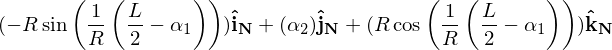

In [3]:
r

#### Tangent to curve

In [4]:
r1 = r.diff(alpha1)
r2 = r.diff(alpha2)
k1 = trigsimp(r1.magnitude())
k2 = trigsimp(r2.magnitude())
r1 = r1/k1 
r2 = r2/k2

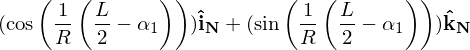

In [5]:
r1

In [6]:
r2

#### Normal to curve

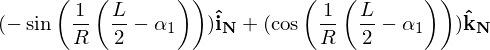

In [7]:
n = r1.cross(r2)
n = trigsimp(n.normalize())
n

### Base Vectors $\vec{R}_1, \vec{R}_2, \vec{R}_3$

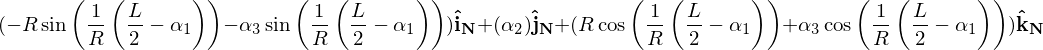

In [8]:
R_alpha=r+alpha3*n
R_alpha

In [9]:
R1=R_alpha.diff(alpha1)
R2=R_alpha.diff(alpha2)
R3=R_alpha.diff(alpha3)

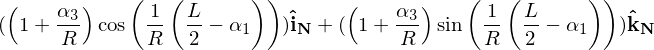

In [10]:
trigsimp(R1)

In [11]:
R2

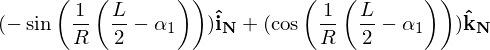

In [12]:
R3

### Draw

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


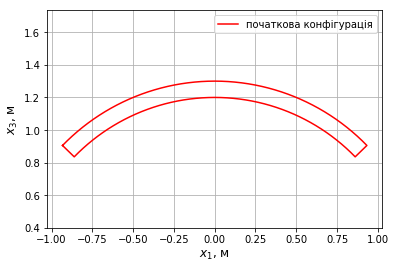

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import plot

x = (R + alpha3) * cos(a1)
z = (R + alpha3) * sin(a1)

alpha1_x = lambdify([R, L, alpha1, alpha3], x, "numpy")
alpha3_z = lambdify([R, L, alpha1, alpha3], z, "numpy")

R_num = 1/0.8
L_num = 2

x1_start = 0
x1_end = L_num
x3_start = -0.05
x3_end = 0.05

def alpha_to_x(a1, a2, a3):
    x=alpha1_x(R_num, L_num, a1, a3)
    z=alpha3_z(R_num, L_num, a1, a3)
    return x, 0, z
    
plot.plot_init_geometry_2(x1_start, x1_end, x3_start, x3_end, alpha_to_x)

#### Base Vectors $\vec{R}^1, \vec{R}^2, \vec{R}^3$

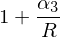

In [14]:
eps=trigsimp(R1.dot(R2.cross(R3)))
R_1=simplify(trigsimp(R2.cross(R3)/eps))
R_2=simplify(trigsimp(R3.cross(R1)/eps))
R_3=simplify(trigsimp(R1.cross(R2)/eps))
eps

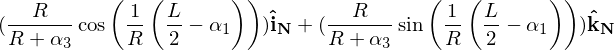

In [15]:
R_1

In [16]:
R_2

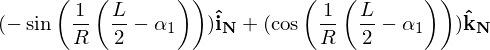

In [17]:
R_3

#### Jacobi matrix:

$ A = \left( 
\begin{array}{ccc} 
\frac{\partial x_1}{\partial \alpha_1} & \frac{\partial x_1}{\partial \alpha_2} & \frac{\partial x_1}{\partial \alpha_3} \\
\frac{\partial x_2}{\partial \alpha_1} & \frac{\partial x_2}{\partial \alpha_2} & \frac{\partial x_3}{\partial \alpha_3} \\
\frac{\partial x_3}{\partial \alpha_1} & \frac{\partial x_3}{\partial \alpha_2} & \frac{\partial x_3}{\partial \alpha_3} \\
\end{array} 
\right)$

$ \left[
\begin{array}{ccc} 
\vec{R}_1 & \vec{R}_2 & \vec{R}_3
\end{array} 
\right] = \left[
\begin{array}{ccc} 
\vec{e}_1 & \vec{e}_2 & \vec{e}_3
\end{array} 
\right] \cdot  \left( 
\begin{array}{ccc} 
\frac{\partial x_1}{\partial \alpha_1} & \frac{\partial x_1}{\partial \alpha_2} & \frac{\partial x_1}{\partial \alpha_3} \\
\frac{\partial x_2}{\partial \alpha_1} & \frac{\partial x_2}{\partial \alpha_2} & \frac{\partial x_3}{\partial \alpha_3} \\
\frac{\partial x_3}{\partial \alpha_1} & \frac{\partial x_3}{\partial \alpha_2} & \frac{\partial x_3}{\partial \alpha_3} \\
\end{array} 
\right) = \left[
\begin{array}{ccc} 
\vec{e}_1 & \vec{e}_2 & \vec{e}_3
\end{array} 
\right] \cdot A$

$ \left[
\begin{array}{ccc} 
\vec{e}_1 & \vec{e}_2 & \vec{e}_3
\end{array} 
\right] =\left[
\begin{array}{ccc} 
\vec{R}_1 & \vec{R}_2 & \vec{R}_3
\end{array} 
\right] \cdot A^{-1}$

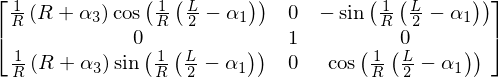

In [18]:
dx1da1=R1.dot(N.i)
dx1da2=R2.dot(N.i)
dx1da3=R3.dot(N.i)

dx2da1=R1.dot(N.j)
dx2da2=R2.dot(N.j)
dx2da3=R3.dot(N.j)

dx3da1=R1.dot(N.k)
dx3da2=R2.dot(N.k)
dx3da3=R3.dot(N.k)

A=Matrix([[dx1da1, dx1da2, dx1da3], [dx2da1, dx2da2, dx2da3], [dx3da1, dx3da2, dx3da3]])
simplify(A)

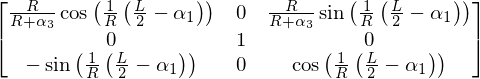

In [19]:
A_inv = trigsimp(A**-1)
simplify(trigsimp(A_inv))

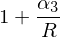

In [20]:
trigsimp(A.det())

### Metric tensor

${\displaystyle \hat{G}=\sum_{i,j} g^{ij}\vec{R}_i\vec{R}_j}$

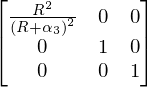

In [21]:
g11=R_1.dot(R_1)
g12=R_1.dot(R_2)
g13=R_1.dot(R_3)

g21=R_2.dot(R_1)
g22=R_2.dot(R_2)
g23=R_2.dot(R_3)

g31=R_3.dot(R_1)
g32=R_3.dot(R_2)
g33=R_3.dot(R_3)

G=Matrix([[g11, g12, g13],[g21, g22, g23], [g31, g32, g33]])
G=trigsimp(G)
G

${\displaystyle \hat{G}=\sum_{i,j} g_{ij}\vec{R}^i\vec{R}^j}$

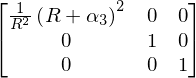

In [22]:
g_11=R1.dot(R1)
g_12=R1.dot(R2)
g_13=R1.dot(R3)

g_21=R2.dot(R1)
g_22=R2.dot(R2)
g_23=R2.dot(R3)

g_31=R3.dot(R1)
g_32=R3.dot(R2)
g_33=R3.dot(R3)

G_con=Matrix([[g_11, g_12, g_13],[g_21, g_22, g_23], [g_31, g_32, g_33]])
G_con=trigsimp(G_con)
G_con

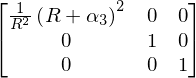

In [23]:
G_inv = G**-1
G_inv

### Christoffel symbols

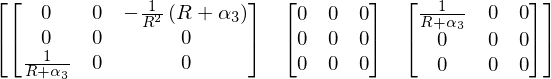

In [24]:
DIM = 3

G_con_diff = MutableDenseNDimArray.zeros(DIM, DIM, DIM)
for i in range(DIM):
    for j in range(DIM):
        for k in range(DIM):
            xdiff = alpha1
            if (k == 0): 
                xdiff = alpha1
            elif (k == 1):
                xdiff = alpha2
            elif (k == 2):
                xdiff = alpha3
            
            G_con_diff[i,j,k]=G_con[i,j].diff(xdiff)
            


GK = MutableDenseNDimArray.zeros(DIM, DIM, DIM)
for i in range(DIM):
    for j in range(DIM):
        for k in range(DIM):
            res = S(0)
            for m in range(DIM):
                res = res + G[m,k]*(G_con_diff[i,m,j]+G_con_diff[j,m,i]-G_con_diff[i,j,m])
            GK[i,j,k] = simplify(S(1)/S(2)*res)


GK

### Gradient of vector

$ 
\left( 
\begin{array}{c} 
\nabla_1 u_1 \\ \nabla_2 u_1 \\ \nabla_3 u_1 \\
\nabla_1 u_2 \\ \nabla_2 u_2 \\ \nabla_3 u_2 \\
\nabla_1 u_3 \\ \nabla_2 u_3 \\ \nabla_3 u_3 \\
\end{array} 
\right)
=  
B \cdot
\left( 
\begin{array}{c} 
u_1 \\
\frac { \partial u_1 } { \partial \alpha_1} \\
\frac { \partial u_1 } { \partial \alpha_2} \\
\frac { \partial u_1 } { \partial \alpha_3} \\
u_2 \\
\frac { \partial u_2 } { \partial \alpha_1} \\
\frac { \partial u_2 } { \partial \alpha_2} \\
\frac { \partial u_2 } { \partial \alpha_3} \\
u_3 \\
\frac { \partial u_3 } { \partial \alpha_1} \\
\frac { \partial u_3 } { \partial \alpha_2} \\
\frac { \partial u_3 } { \partial \alpha_3} \\
\end{array} 
\right) 
= B \cdot D \cdot
\left( 
\begin{array}{c} 
u^1 \\
\frac { \partial u^1 } { \partial \alpha_1} \\
\frac { \partial u^1 } { \partial \alpha_2} \\
\frac { \partial u^1 } { \partial \alpha_3} \\
u^2 \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\frac { \partial u^2 } { \partial \alpha_3} \\
u^3 \\
\frac { \partial u^3 } { \partial \alpha_1} \\
\frac { \partial u^3 } { \partial \alpha_2} \\
\frac { \partial u^3 } { \partial \alpha_3} \\
\end{array} 
\right) 
$

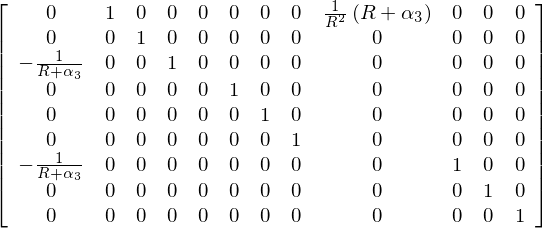

In [25]:
def row_index_to_i_j_grad(i_row):
    return i_row // 3, i_row % 3
        

B = zeros(9, 12)
B[0,1] = S(1)
B[1,2] = S(1)

B[2,3] = S(1)

B[3,5] = S(1)
B[4,6] = S(1)
B[5,7] = S(1)

B[6,9] = S(1)
B[7,10] = S(1)
B[8,11] = S(1)

for row_index in range(9):
    i,j=row_index_to_i_j_grad(row_index)
    B[row_index, 0] = -GK[i,j,0]
    B[row_index, 4] = -GK[i,j,1]
    B[row_index, 8] = -GK[i,j,2]

B

In [26]:
q=(1+alpha3/R)
g_=(q*q)
koef=g_.diff(alpha3)

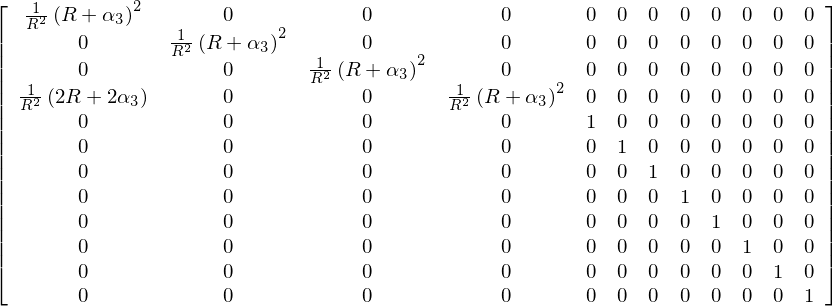

In [27]:
D=eye(12)
D[0,0]=G_con[0,0]
D[1,1]=G_con[0,0]
D[2,2]=G_con[0,0]
D[3,3]=G_con[0,0]
D[3,0]=G_con[0,0].diff(alpha3)
D

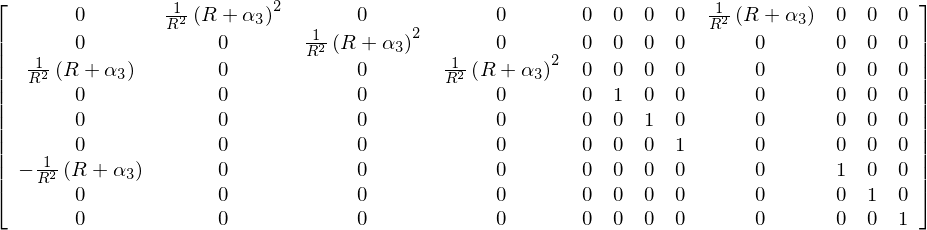

In [28]:
simplify(B*D)

### Strain tensor

$ 
\left( 
\begin{array}{c} 
\varepsilon_{11} \\ 
\varepsilon_{22} \\ 
\varepsilon_{33} \\ 
2\varepsilon_{12} \\ 
2\varepsilon_{13} \\ 
2\varepsilon_{23} \\ 
\end{array} 
\right)
=  
E \cdot 
\left( 
\begin{array}{c} 
\nabla_1 u_1 \\ \nabla_2 u_1 \\ \nabla_3 u_1 \\
\nabla_1 u_2 \\ \nabla_2 u_2 \\ \nabla_3 u_2 \\
\nabla_1 u_3 \\ \nabla_2 u_3 \\ \nabla_3 u_3 \\
\end{array} 
\right)$

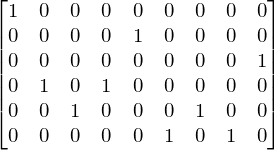

In [29]:
E=zeros(6,9)
E[0,0]=1
E[1,4]=1
E[2,8]=1
E[3,1]=1
E[3,3]=1
E[4,2]=1
E[4,6]=1
E[5,5]=1
E[5,7]=1
E


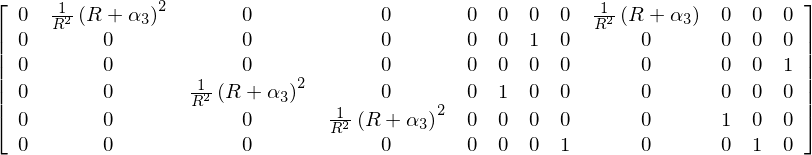

In [30]:
Q=E*B*D
Q=simplify(Q)
Q

### Elasticity tensor(stiffness tensor)

#### General form

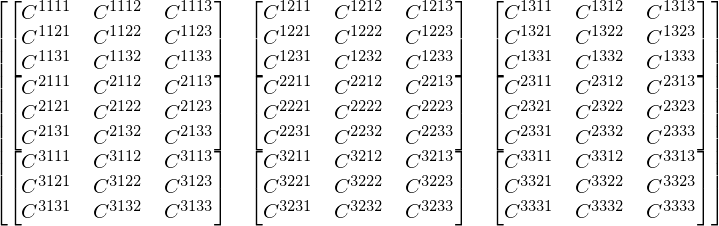

In [31]:
from sympy import MutableDenseNDimArray
C_x = MutableDenseNDimArray.zeros(3, 3, 3, 3)

for i in range(3):
    for j in range(3):        
        for k in range(3):
            for l in range(3):
                elem_index = 'C^{{{}{}{}{}}}'.format(i+1, j+1, k+1, l+1)
                el = Symbol(elem_index)
                C_x[i,j,k,l] = el
                
C_x

#### Include symmetry

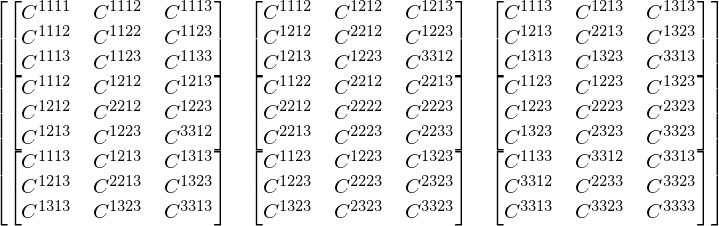

In [32]:
C_x_symmetry = MutableDenseNDimArray.zeros(3, 3, 3, 3)

def getCIndecies(index):
    if (index == 0):
        return 0, 0
    elif (index == 1):
        return 1, 1
    elif (index == 2):
        return 2, 2
    elif (index == 3):
        return 0, 1
    elif (index == 4):
        return 0, 2
    elif (index == 5):
        return 1, 2
    
for s in range(6):
    for t in range(s, 6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        elem_index = 'C^{{{}{}{}{}}}'.format(i+1, j+1, k+1, l+1)
        el = Symbol(elem_index)
        C_x_symmetry[i,j,k,l] = el
        C_x_symmetry[i,j,l,k] = el
        C_x_symmetry[j,i,k,l] = el
        C_x_symmetry[j,i,l,k] = el
        C_x_symmetry[k,l,i,j] = el
        C_x_symmetry[k,l,j,i] = el
        C_x_symmetry[l,k,i,j] = el
        C_x_symmetry[l,k,j,i] = el

                
C_x_symmetry

#### Isotropic material

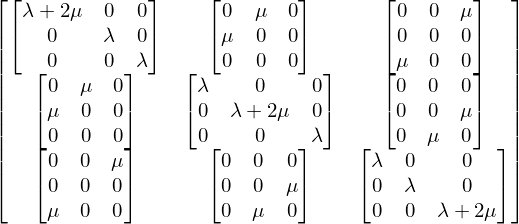

In [33]:
C_isotropic = MutableDenseNDimArray.zeros(3, 3, 3, 3)

C_isotropic_matrix = zeros(6)

mu = Symbol('mu')
la = Symbol('lambda')

for s in range(6):
    for t in range(s, 6):
        if (s < 3 and t < 3):
            if(t != s):
                C_isotropic_matrix[s,t] = la
                C_isotropic_matrix[t,s] = la
            else:
                C_isotropic_matrix[s,t] = 2*mu+la
                C_isotropic_matrix[t,s] = 2*mu+la
        elif (s == t):
            C_isotropic_matrix[s,t] = mu
            C_isotropic_matrix[t,s] = mu
            
for s in range(6):
    for t in range(s, 6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        el = C_isotropic_matrix[s, t]
        C_isotropic[i,j,k,l] = el
        C_isotropic[i,j,l,k] = el
        C_isotropic[j,i,k,l] = el
        C_isotropic[j,i,l,k] = el
        C_isotropic[k,l,i,j] = el
        C_isotropic[k,l,j,i] = el
        C_isotropic[l,k,i,j] = el
        C_isotropic[l,k,j,i] = el

                
C_isotropic

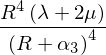

In [34]:
def getCalpha(C, A, q, p, s, t):
    res = S(0)
    for i in range(3):
        for j in range(3):        
            for k in range(3):
                for l in range(3):
                    res += C[i,j,k,l]*A[q,i]*A[p,j]*A[s,k]*A[t,l]
    return simplify(trigsimp(res))
                    


C_isotropic_alpha = MutableDenseNDimArray.zeros(3, 3, 3, 3)

for i in range(3):
    for j in range(3):        
        for k in range(3):
            for l in range(3):
                c = getCalpha(C_isotropic, A_inv, i, j, k, l)
                C_isotropic_alpha[i,j,k,l] = c

C_isotropic_alpha[0,0,0,0]

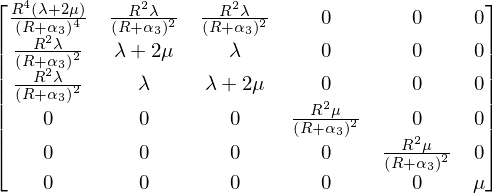

In [35]:
C_isotropic_matrix_alpha = zeros(6)

for s in range(6):
    for t in range(6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        C_isotropic_matrix_alpha[s,t] = C_isotropic_alpha[i,j,k,l]
        
C_isotropic_matrix_alpha

#### Orthotropic material

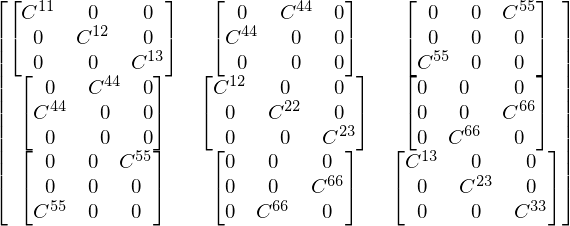

In [36]:
C_orthotropic = MutableDenseNDimArray.zeros(3, 3, 3, 3)

C_orthotropic_matrix = zeros(6)

for s in range(6):
    for t in range(s, 6):
        elem_index = 'C^{{{}{}}}'.format(s+1, t+1)
        el = Symbol(elem_index)
        if ((s < 3 and t < 3) or t == s):
            C_orthotropic_matrix[s,t] = el
            C_orthotropic_matrix[t,s] = el
            
for s in range(6):
    for t in range(s, 6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        el = C_orthotropic_matrix[s, t]
        C_orthotropic[i,j,k,l] = el
        C_orthotropic[i,j,l,k] = el
        C_orthotropic[j,i,k,l] = el
        C_orthotropic[j,i,l,k] = el
        C_orthotropic[k,l,i,j] = el
        C_orthotropic[k,l,j,i] = el
        C_orthotropic[l,k,i,j] = el
        C_orthotropic[l,k,j,i] = el

                
C_orthotropic

#### Orthotropic material in shell coordinates

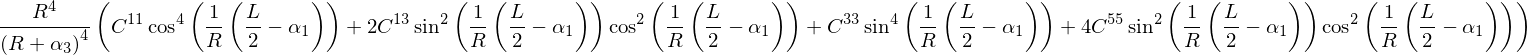

In [37]:
def getCalpha(C, A, q, p, s, t):
    res = S(0)
    for i in range(3):
        for j in range(3):        
            for k in range(3):
                for l in range(3):
                    res += C[i,j,k,l]*A[q,i]*A[p,j]*A[s,k]*A[t,l]
    return simplify(trigsimp(res))
                    


C_orthotropic_alpha = MutableDenseNDimArray.zeros(3, 3, 3, 3)

for i in range(3):
    for j in range(3):        
        for k in range(3):
            for l in range(3):
                c = getCalpha(C_orthotropic, A_inv, i, j, k, l)
                C_orthotropic_alpha[i,j,k,l] = c

C_orthotropic_alpha[0,0,0,0]

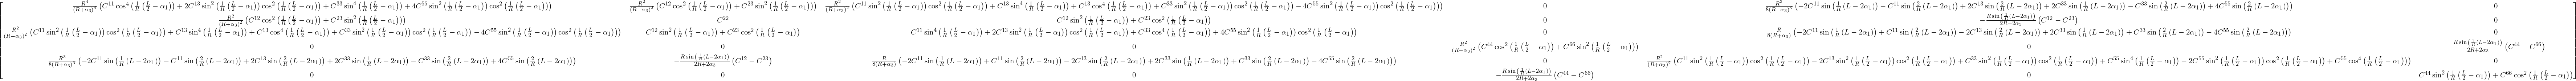

In [38]:
C_orthotropic_matrix_alpha = zeros(6)

for s in range(6):
    for t in range(6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        C_orthotropic_matrix_alpha[s,t] = C_orthotropic_alpha[i,j,k,l]
        
C_orthotropic_matrix_alpha

### Physical coordinates

$u^1=\frac{u_{[1]}}{1+\frac{\alpha_3}{R}}$

$\frac{\partial u^1} {\partial \alpha_3}=\frac{1}{1+\frac{\alpha_3}{R}} \frac{\partial u_{[1]}} {\partial \alpha_3} + u_{[1]} \frac{\partial} {\partial \alpha_3} \left( \frac{1}{1+\frac{\alpha_3}{R}} \right) =\frac{1}{1+\frac{\alpha_3}{R}} \frac{\partial u_{[1]}} {\partial \alpha_3} - u_{[1]} \frac{1}{R \left( 1+\frac{\alpha_3}{R} \right)^2} $

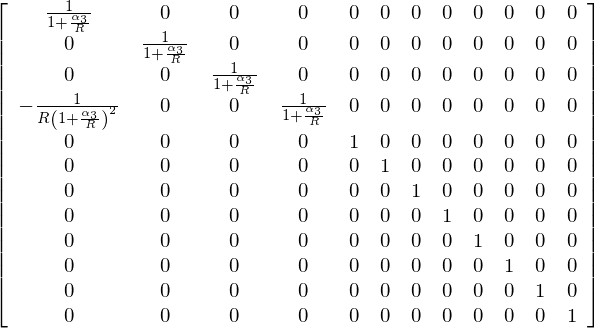

In [39]:
P=eye(12,12)
P[0,0]=1/(1+alpha3/R)
P[1,1]=1/(1+alpha3/R)
P[2,2]=1/(1+alpha3/R)
P[3,0]=-1/(R*(1+alpha3/R)**2)
P[3,3]=1/(1+alpha3/R)
P

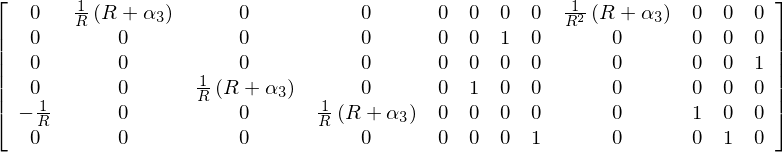

In [40]:
Def=simplify(E*B*D*P)
Def

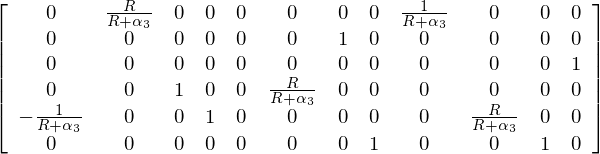

In [41]:
rows, cols = Def.shape
D_p=zeros(rows, cols)
q = 1+alpha3/R
for i in range(rows):
    ratio = 1
    if (i==0):
        ratio = q*q
    elif (i==3 or i == 4):
        ratio = q
    
    for j in range(cols):
        D_p[i,j] = Def[i,j] / ratio

D_p = simplify(D_p)
D_p

#### Stiffness tensor

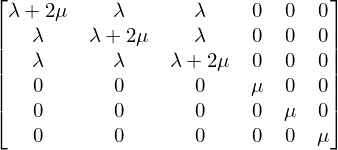

In [42]:
C_isotropic_alpha_p = MutableDenseNDimArray.zeros(3, 3, 3, 3)
q=1+alpha3/R
for i in range(3):
    for j in range(3):        
        for k in range(3):
            for l in range(3):
                fact = 1
                if (i==0):
                    fact = fact*q
                if (j==0):
                    fact = fact*q
                if (k==0):
                    fact = fact*q
                if (l==0):
                    fact = fact*q
                C_isotropic_alpha_p[i,j,k,l] = simplify(C_isotropic_alpha[i,j,k,l]*fact)
            
C_isotropic_matrix_alpha_p = zeros(6)

for s in range(6):
    for t in range(6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        C_isotropic_matrix_alpha_p[s,t] = C_isotropic_alpha_p[i,j,k,l]
        
C_isotropic_matrix_alpha_p

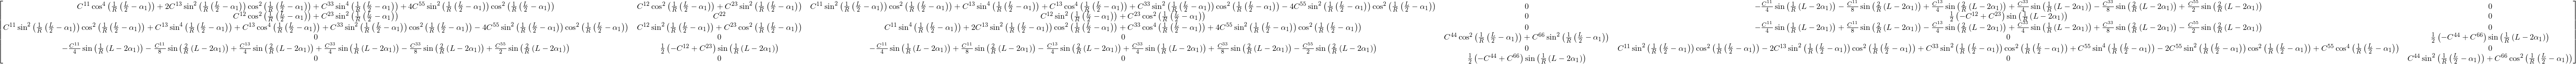

In [43]:
C_orthotropic_alpha_p = MutableDenseNDimArray.zeros(3, 3, 3, 3)
q=1+alpha3/R
for i in range(3):
    for j in range(3):        
        for k in range(3):
            for l in range(3):
                fact = 1
                if (i==0):
                    fact = fact*q
                if (j==0):
                    fact = fact*q
                if (k==0):
                    fact = fact*q
                if (l==0):
                    fact = fact*q
                C_orthotropic_alpha_p[i,j,k,l] = simplify(C_orthotropic_alpha[i,j,k,l]*fact)
            
C_orthotropic_matrix_alpha_p = zeros(6)

for s in range(6):
    for t in range(6):
        i,j = getCIndecies(s)
        k,l = getCIndecies(t)
        C_orthotropic_matrix_alpha_p[s,t] = C_orthotropic_alpha_p[i,j,k,l]
        
C_orthotropic_matrix_alpha_p

## Square of segment 

$A=\frac {\theta}{2} \left( R + h_2 \right)^2-\frac {\theta}{2} \left( R + h_1 \right)^2$

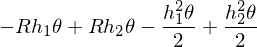

In [44]:
theta, h1, h2=symbols('theta h_1 h_2')
square_geom=theta/2*(R+h2)**2-theta/2*(R+h1)**2
expand(simplify(square_geom))

${\displaystyle A=\int_{0}^{L}\int_{h_1}^{h_2} \left( 1+\frac{\alpha_3}{R} \right) d \alpha_1 d \alpha_3}, L=R \theta$

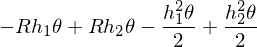

In [45]:
square_int=integrate(integrate(1+alpha3/R, (alpha3, h1, h2)), (alpha1, 0, theta*R))
expand(simplify(square_int))

### Tymoshenko theory

$u^1 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u\left( \alpha_1 \right)+\alpha_3\gamma \left( \alpha_1 \right) $

$u^2 \left( \alpha_1, \alpha_2, \alpha_3 \right)=0 $

$u^3 \left( \alpha_1, \alpha_2, \alpha_3 \right)=w\left( \alpha_1 \right) $

$ \left( 
\begin{array}{c} 
u^1 \\
\frac { \partial u^1 } { \partial \alpha_1} \\
\frac { \partial u^1 } { \partial \alpha_2} \\
\frac { \partial u^1 } { \partial \alpha_3} \\
u^2 \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\frac { \partial u^2 } { \partial \alpha_3} \\
u^3 \\
\frac { \partial u^3 } { \partial \alpha_1} \\
\frac { \partial u^3 } { \partial \alpha_2} \\
\frac { \partial u^3 } { \partial \alpha_3} \\
\end{array} 
\right) = T \cdot 
\left( 
\begin{array}{c} 
u \\
\frac { \partial u } { \partial \alpha_1} \\
\gamma \\
\frac { \partial \gamma } { \partial \alpha_1} \\
w \\
\frac { \partial w } { \partial \alpha_1} \\
\end{array} 
\right) $

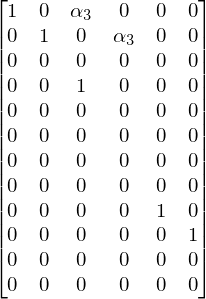

In [46]:
T=zeros(12,6)
T[0,0]=1
T[0,2]=alpha3
T[1,1]=1
T[1,3]=alpha3
T[3,2]=1

T[8,4]=1
T[9,5]=1
T

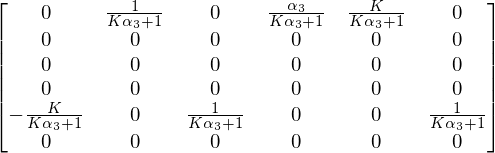

In [47]:
D_p_T = D_p*T
K = Symbol('K')
D_p_T = D_p_T.subs(R, 1/K)
simplify(D_p_T)

### Square theory

$u^1 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u_{10}\left( \alpha_1 \right)p_0\left( \alpha_3 \right)+u_{11}\left( \alpha_1 \right)p_1\left( \alpha_3 \right)+u_{12}\left( \alpha_1 \right)p_2\left( \alpha_3 \right) $

$u^2 \left( \alpha_1, \alpha_2, \alpha_3 \right)=0 $

$u^3 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u_{30}\left( \alpha_1 \right)p_0\left( \alpha_3 \right)+u_{31}\left( \alpha_1 \right)p_1\left( \alpha_3 \right)+u_{32}\left( \alpha_1 \right)p_2\left( \alpha_3 \right) $

$ \left( 
\begin{array}{c} 
u^1 \\
\frac { \partial u^1 } { \partial \alpha_1} \\
\frac { \partial u^1 } { \partial \alpha_2} \\
\frac { \partial u^1 } { \partial \alpha_3} \\
u^2 \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\frac { \partial u^2 } { \partial \alpha_3} \\
u^3 \\
\frac { \partial u^3 } { \partial \alpha_1} \\
\frac { \partial u^3 } { \partial \alpha_2} \\
\frac { \partial u^3 } { \partial \alpha_3} \\
\end{array} 
\right) = L \cdot 
\left( 
\begin{array}{c} 
u_{10} \\
\frac { \partial u_{10} } { \partial \alpha_1} \\
u_{11} \\
\frac { \partial u_{11} } { \partial \alpha_1} \\
u_{12} \\
\frac { \partial u_{12} } { \partial \alpha_1} \\
u_{30} \\
\frac { \partial u_{30} } { \partial \alpha_1} \\
u_{31} \\
\frac { \partial u_{31} } { \partial \alpha_1} \\
u_{32} \\
\frac { \partial u_{32} } { \partial \alpha_1} \\
\end{array} 
\right) $

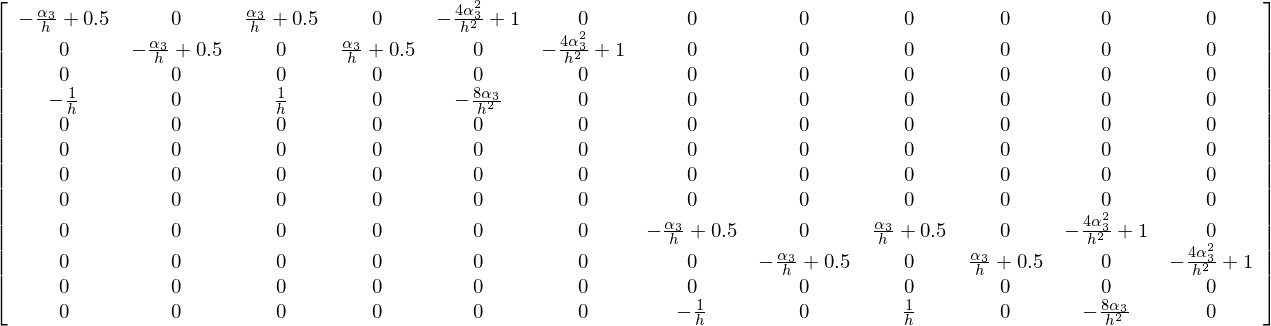

In [59]:
L=zeros(12,12)
p0=1/2-alpha3/h
p1=1/2+alpha3/h
p2=1-(2*alpha3/h)**2

L[0,0]=p0
L[0,2]=p1
L[0,4]=p2

L[1,1]=p0
L[1,3]=p1
L[1,5]=p2

L[3,0]=p0.diff(alpha3)
L[3,2]=p1.diff(alpha3)
L[3,4]=p2.diff(alpha3)

L[8,6]=p0
L[8,8]=p1
L[8,10]=p2

L[9,7]=p0
L[9,9]=p1
L[9,11]=p2

L[11,6]=p0.diff(alpha3)
L[11,8]=p1.diff(alpha3)
L[11,10]=p2.diff(alpha3)

L

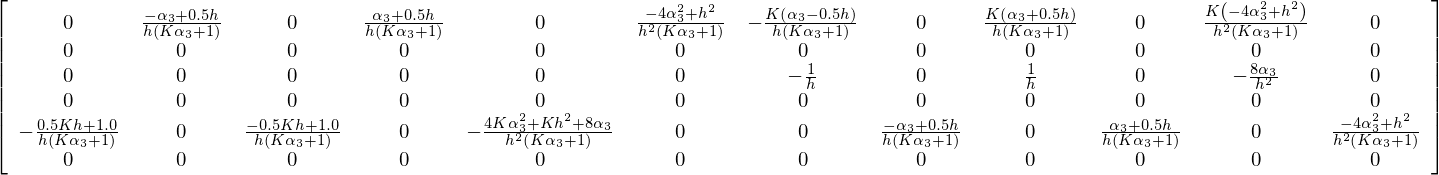

In [60]:
D_p_L = D_p*L
K = Symbol('K')
D_p_L = D_p_L.subs(R, 1/K)
simplify(D_p_L)

## Virtual work

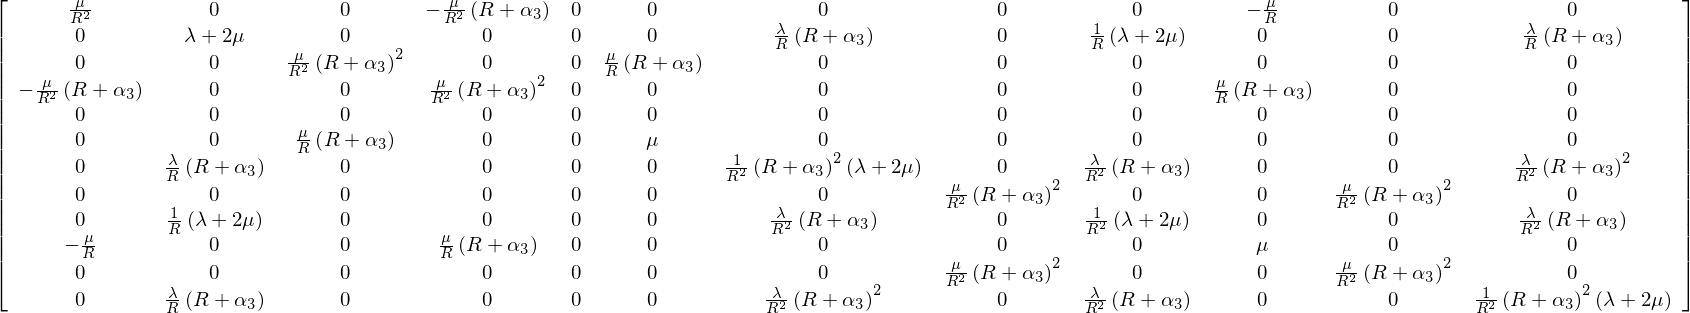

In [48]:
Q=E*B*D*P
S=simplify(Q.T*C_isotropic_matrix_alpha*Q*(1+alpha3/R)**2)
S

### Isotropic material physical coordinates

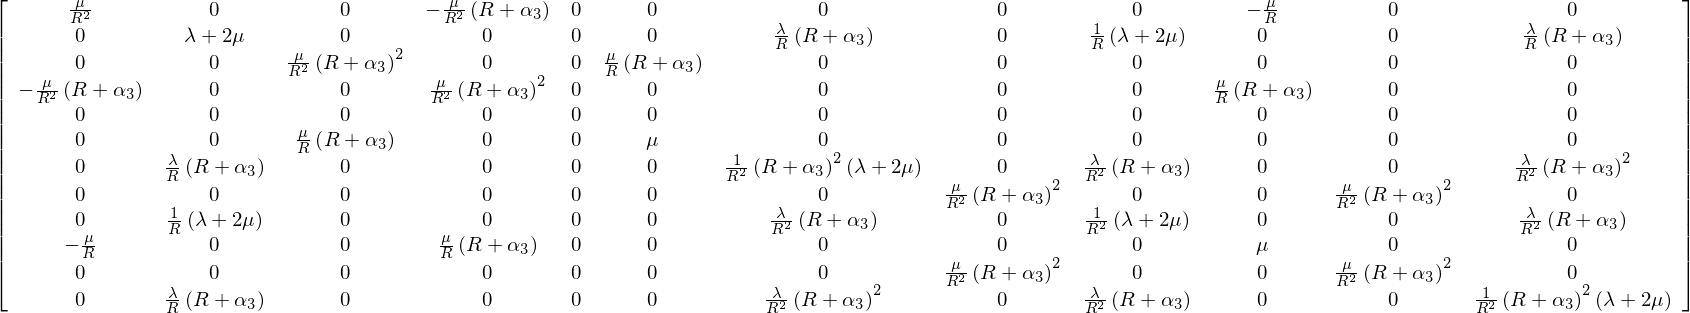

In [49]:
S = simplify(D_p.T*C_isotropic_matrix_alpha_p*D_p*(1+alpha3/R)**2)
S

### Isotropic material physical coordinates - Tymoshenko

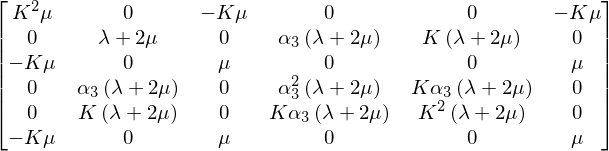

In [52]:
W = simplify(D_p_T.T*C_isotropic_matrix_alpha_p*D_p_T*(1+K*alpha3)**2)
W

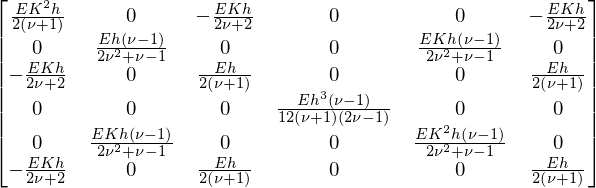

In [58]:
h=Symbol('h')
E=Symbol('E')
v=Symbol('nu')
W_a3 = integrate(W, (alpha3, -h/2, h/2))
W_a3 = W_a3.subs(la, E*v/((1+v)*(1-2*v))).subs(mu, E/((1+v)*2))
W_a3 = simplify(W_a3)
W_a3

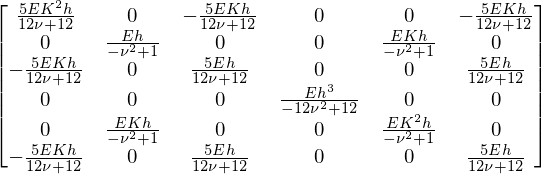

In [66]:
A_M = zeros(3)
A_M[0,0] = E*h/(1-v**2)
A_M[1,1] = 5*E*h/(12*(1+v))
A_M[2,2] = E*h**3/(12*(1-v**2))
Q_M = zeros(3,6)
Q_M[0,1] = 1
Q_M[0,4] = K
Q_M[1,0] = -K
Q_M[1,2] = 1
Q_M[1,5] = 1
Q_M[2,3] = 1

W_M=Q_M.T*A_M*Q_M
W_M

### Isotropic material physical coordinates - Square

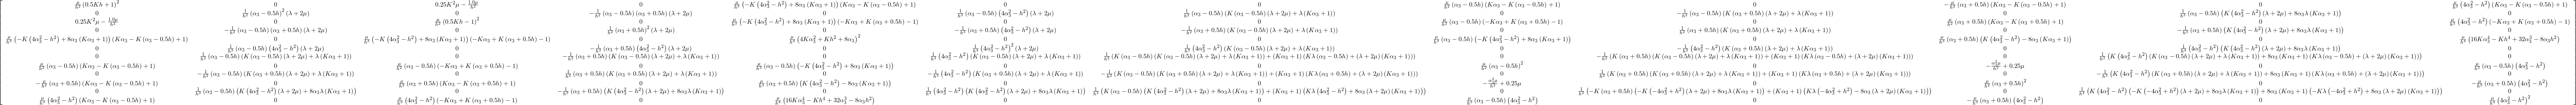

In [61]:
W = simplify(D_p_L.T*C_isotropic_matrix_alpha_p*D_p_L*(1+K*alpha3)**2)
W

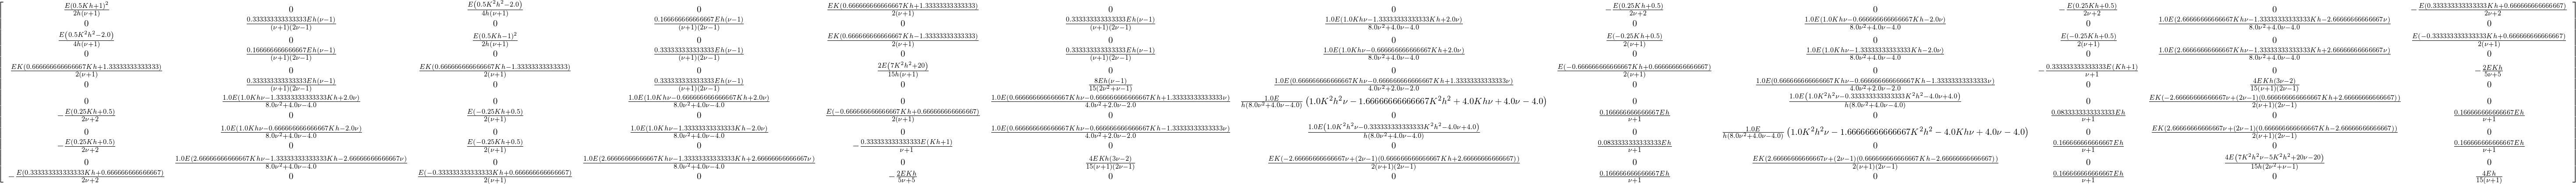

In [62]:
h=Symbol('h')
E=Symbol('E')
v=Symbol('nu')
W_a3 = integrate(W, (alpha3, -h/2, h/2))
W_a3 = W_a3.subs(la, E*v/((1+v)*(1-2*v))).subs(mu, E/((1+v)*2))
W_a3 = simplify(W_a3)
W_a3

## Mass matrix in physical coordinates

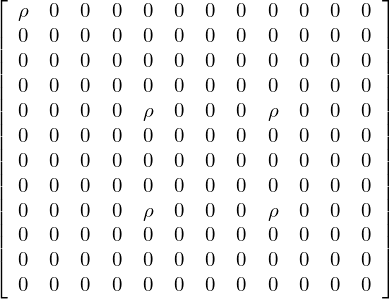

In [67]:
rho=Symbol('rho')
B_h=zeros(3,12)
B_h[0,0]=1
B_h[1,4]=1
B_h[1,8]=1
M=simplify(rho*P.T*B_h.T*G_con*B_h*P)
M

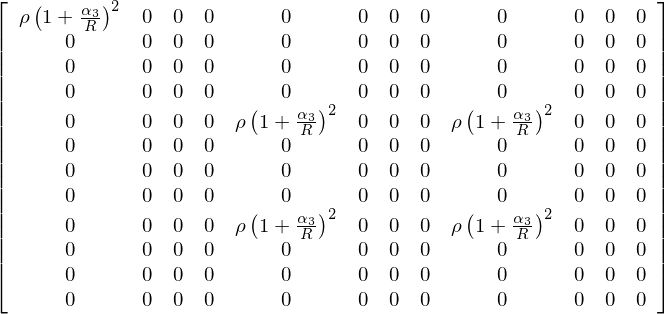

In [74]:
M_p = rho*B_h.T*B_h*(1+alpha3/R)**2
M_p

In [76]:
mass_matrix_func = lambdify((rho, R, alpha3), M_p, "numpy")
mass_matrix_func(100,10,20)

array([[900.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0., 900.,   0.,   0.,   0., 900.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0., 900.,   0.,   0.,   0., 900.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,  

In [77]:
stiffness_matrix_func = lambdify([R, mu, la, alpha3], S, "numpy")
stiffness_matrix_func(100, 200, 300, 400)

array([[ 2.00e-02,  0.00e+00,  0.00e+00, -1.00e+01,  0.00e+00,  0.00e+00,
         0.00e+00,  0.00e+00,  0.00e+00, -2.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  7.00e+02,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
         1.50e+03,  0.00e+00,  7.00e+00,  0.00e+00,  0.00e+00,  1.50e+03],
       [ 0.00e+00,  0.00e+00,  5.00e+03,  0.00e+00,  0.00e+00,  1.00e+03,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [-1.00e+01,  0.00e+00,  0.00e+00,  5.00e+03,  0.00e+00,  0.00e+00,
         0.00e+00,  0.00e+00,  0.00e+00,  1.00e+03,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  1.00e+03,  0.00e+00,  0.00e+00,  2.00e+02,
         0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  1.50e+03,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
         1.75e+04,  0.00e+00,  1

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


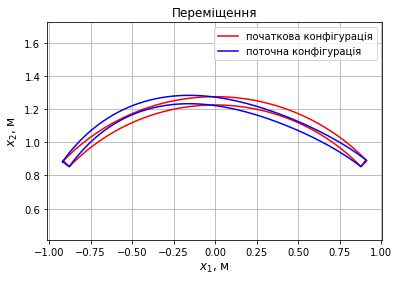

25.518397195470808
37.65055553043148
53.02521516884746
59.12459462472745
73.89906602067028
76.7238220818741
92.86152431436375
95.74961566522097
111.69858911730539
115.37879991578257
128.43308532025998
133.39281956188958
147.98227182643734
148.02904662879308
161.91555797565047
166.73482225476707
176.81831442359024
181.56173242142907
193.8669205843182
194.17303269234304


In [78]:
import fem.geometry as g
import fem.model as m
import fem.material as mat
import fem.solver as s
import fem.mesh as me
import plot


def generate_layers(thickness, layers_count, material):
    layer_top = thickness / 2
    layer_thickness = thickness / layers_count
    layers = set()
    for i in range(layers_count):
        layer = m.Layer(layer_top - layer_thickness, layer_top, material, i)
        layers.add(layer)
        layer_top -= layer_thickness
    return layers


def solve(width, curvature, thickness):
    layers_count = 1
    layers = generate_layers(thickness, layers_count, mat.IsotropicMaterial.steel())
    mesh = me.Mesh.generate(width, layers, N, M, m.Model.FIXED_BOTTOM_LEFT_RIGHT_POINTS)
#    geometry = g.CorrugatedCylindricalPlate(width, curvature, corrugation_amplitude, corrugation_frequency)
    geometry = g.CylindricalPlate(width, curvature)
#    geometry = g.Geometry()
    model = m.Model(geometry, layers, m.Model.FIXED_BOTTOM_LEFT_RIGHT_POINTS)
    return s.solve(model, mesh, stiffness_matrix, mass_matrix)

def stiffness_matrix(material, geometry, x1, x2, x3):
    return stiffness_matrix_func(1/geometry.curvature, material.mu(), material.lam(), x3)

def mass_matrix(material, geometry, x1, x2, x3):
    return mass_matrix_func(material.rho, 1/geometry.curvature, x3)


# r=2
# width = r*2*3.14
# curvature = 1/r

width = 2
curvature = 0.8
thickness = 0.05

N = 100
M = 10


results = solve(width, curvature, thickness)
results_index = 0
plot.plot_init_and_deformed_geometry(results[results_index], 0, width, -thickness / 2, thickness / 2, 0)
#plot.plot_init_geometry(results[results_index].geometry, 0, width, -thickness / 2, thickness / 2, 0)
# plot.plot_strain(results[results_index], 0, width, -thickness / 2, thickness / 2, 0)


to_print = 20
if (len(results) < to_print):
    to_print = len(results)

for i in range(to_print):
    print(results[i].freq)